In [1]:
import pandas as pd

import scripts.similarity_metrics as similarity_metrics
from scripts.similarity_metrics import NormalizationLevel

In [2]:
def apply_similarity_metrics(data_df: pd.DataFrame):
    df = data_df.copy()
    df.drop(columns=["ref_normalized", "hyp_normalized", "wer", "cer", "sequence_similarity", "ref_word_count",
                     "hyp_word_count"], inplace=True, errors="ignore")
    df.rename(columns={"predicted_sentence": "text_spt"}, inplace=True, errors="ignore")

    # Apply similarity metrics to each row
    metrics = df.apply(
        lambda row: similarity_metrics.calculate(
            reference=row["text_original"],
            hypothesis=row["text_spt"],
            normalization_level=NormalizationLevel.LIGHT),
        axis=1
    )

    # Convert list of dicts → DataFrame
    metrics_df = pd.DataFrame(metrics.tolist())

    metrics_df.index = df.index

    # Merge metric columns back into main DataFrame and save
    df = pd.concat([df, metrics_df], axis=1).sort_values("wer", ascending=False)
    return df

In [3]:
usc_df = pd.read_csv("uzbek-speech-corpus__case_insensitive.csv", index_col="id")
usc_df = apply_similarity_metrics(usc_df)
usc_df.to_csv("uzbek-speech-corpus__case_insensitive.csv", index_label="id")
usc_df

,speaker_id,path,duration,word_count,type,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,
10093,911079671,911079671_1_16664_3.wav,3.9000,6,validation,birdan ikki yaxshi ikkidan uch yaxshi,"1 dan 2 yaxshi, 2 dan 3 yaxshi.",birdan ikki yaxshi ikkidan uch yaxshi,"1 dan 2 yaxshi, 2 dan 3 yaxshi.",1.3333,0.4324,0.6765,6,8
1326,600717944,600717944_1_944_1.wav,3.1465,3,train,men o'ttiz yoshdaman,Men 30 yoshdaman.,men o'ttiz yoshdaman,Men 30 yoshdaman.,1.0000,0.4000,0.7027,3,3
1325,600717944,600717944_1_943_1.wav,3.0265,3,train,men yigirma yoshdaman,Men 20 yoshdaman.,men yigirma yoshdaman,Men 20 yoshdaman.,1.0000,0.4286,0.6842,3,3
1063,833428527,833428527_1_8207_2.wav,3.1465,3,train,bo'pti qoravoylar popuklar,"Bo'pti, qoravoylar, popuklar.",bo'pti qoravoylar popuklar,"Bo'pti, qoravoylar, popuklar.",1.0000,0.1538,0.9091,3,3
2266,31,31_data_31-47.wav,3.7200,2,train,qaysi qo'rg'onga,Qaysi qo'rg'onga?,qaysi qo'rg'onga,Qaysi qo'rg'onga?,1.0000,0.1250,0.9091,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,307064776,307064776_1_74892_1.wav,3.4400,6,train,baland bo'yli o'zidan nur taratib turgan,baland bo'yli o'zidan nur taratib turgan,baland bo'yli o'zidan nur taratib turgan,baland bo'yli o'zidan nur taratib turgan,0.0000,0.0000,1.0000,6,6
2418,33,33_data_33-79.wav,5.8000,8,test,eng pastda chang chalayotgan go'zal bir qiznin...,eng pastda chang chalayotgan go'zal bir qiznin...,eng pastda chang chalayotgan go'zal bir qiznin...,eng pastda chang chalayotgan go'zal bir qiznin...,0.0000,0.0000,1.0000,8,8
16845,560947882,560947882_1_42542_1.wav,3.4465,4,train,faqat ikkalamiz yashaydigan joyga,faqat ikkalamiz yashaydigan joyga,faqat ikkalamiz yashaydigan joyga,faqat ikkalamiz yashaydigan joyga,0.0000,0.0000,1.0000,4,4


In [4]:
feruza_speech_df = pd.read_csv("feruza_speech_part1.csv", index_col="id")
feruza_speech_df.drop(columns=["text_cyrillic"], inplace=True)
feruza_speech_df.rename(columns={"text_latin": "text_original"}, inplace=True)

# Reorder text_original column to be one before the last column
cols = list(feruza_speech_df.columns)
cols.remove("text_original")
cols.insert(3, "text_original")
feruza_speech_df = feruza_speech_df[cols]

feruza_speech_df = apply_similarity_metrics(feruza_speech_df)
feruza_speech_df

,path,type,duration,text_original,text_spt,word_count,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,
1997,029-92.wav,validation,5.500063,"CH..., 1-may.",Ch 1-may,3,"CH..., 1-may.",Ch 1-may,1.0000,0.4615,0.6667,2,2
1193,1055-86.wav,train,4.132000,So'nggi tafsilotlar.,so'nggi tafsilotlar,2,So'nggi tafsilotlar.,so'nggi tafsilotlar,1.0000,0.1000,0.9231,2,2
1880,026-01.wav,validation,3.380000,"B..., 19-mart.",B 19-mart,3,"B..., 19-mart.",B 19-mart,1.0000,0.3571,0.7826,2,2
369,1059-77.wav,train,5.367563,Aloqador mavzular:,aloqador mavzular,2,Aloqador mavzular:,aloqador mavzular,1.0000,0.1111,0.9143,2,2
1967,029-105.wav,validation,18.548500,"— Unda o'n to'qqiz, mayli, o'n sakkiz ham bo'l...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...",22,"Unda o'n to'qqiz, mayli, o'n sakkiz ham bo'lsi...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...",0.5714,0.2264,0.8483,21,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,1029-90.wav,train,15.860062,AQSH parchalanadimi? - Sobiq prezident Donald ...,AQSH parchalanadimi? Sobiq prezident Donald Tr...,19,AQSH parchalanadimi? Sobiq prezident Donald Tr...,AQSH parchalanadimi? Sobiq prezident Donald Tr...,0.0000,0.0000,1.0000,18,18
622,1053-10.wav,train,14.434750,"Islomda payg'ambarning har qanday tasviri, hat...","Islomda payg'ambarning har qanday tasviri, hat...",16,"Islomda payg'ambarning har qanday tasviri, hat...","Islomda payg'ambarning har qanday tasviri, hat...",0.0000,0.0000,1.0000,16,16
703,1064-77.wav,train,12.057375,Hukumatning Istanbul bo'yicha natijalarni qayt...,Hukumatning Istanbul bo'yicha natijalarni qayt...,11,Hukumatning Istanbul bo'yicha natijalarni qayt...,Hukumatning Istanbul bo'yicha natijalarni qayt...,0.0000,0.0000,1.0000,11,11


In [5]:
mask = feruza_speech_df["wer"] > 0.0
total_duration_affected = feruza_speech_df[mask]["duration"].sum() / 3600
total_duration = feruza_speech_df["duration"].sum() / 3600

feruza_speech_df.loc[mask, "ref_normalized"] = feruza_speech_df.loc[mask, "hyp_normalized"]
feruza_speech_df.loc[mask, "wer"] = 0.0
feruza_speech_df.loc[mask, "cer"] = 0.0
feruza_speech_df.loc[mask, "sequence_similarity"] = 1.0
feruza_speech_df.loc[mask, "ref_word_count"] = feruza_speech_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
feruza_speech_df.to_csv("feruza_speech_modified_part1.csv", index_label="id")

Total duration affected: 2.45 hours (out of 4.39 hours)


In [6]:
common_voice_df = pd.read_csv("common_voice_part1.csv", index_col="id")
common_voice_df.drop(columns={"speaker_trust_score"}, inplace=True)
common_voice_df.rename(
    columns={"sentence": "text_original", "predicted_sentence": "text_spt", "client_id": "speaker_id"},
    inplace=True
)

# Rename dataset type: dev -> validation
common_voice_df["type"] = common_voice_df["type"].replace("dev", "validation")
common_voice_df["path"] = common_voice_df["path"].str.replace(r".mp3$", ".wav", regex=True)

# Reorder text_original column to be one before the last column
cols = list(common_voice_df.columns)
cols.remove("text_original")
cols.insert(10, "text_original")
cols.remove("text_spt")
cols.insert(11, "text_spt")
cols.remove("speaker_id")
cols.insert(1, "speaker_id")
common_voice_df = common_voice_df[cols]

common_voice_df["path"] = common_voice_df["path"].str.replace(r".mp3$", ".wav", regex=True)

common_voice_df = apply_similarity_metrics(common_voice_df)
common_voice_df

,path,speaker_id,sentence_id,up_votes,down_votes,age,gender,type,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,
7571,common_voice_uz_28892774.wav,633f4e362252d4c478e27f908b68480f89933e92839bb0...,a5356ceefe726034a0742413320f4c76f853b887750144...,2,0,twenties,male_masculine,train,3.456,2,O'g'illarini uylantirdi.,o'g'illarini uylantirdi,O'g'illarini uylantirdi.,o'g'illarini uylantirdi,1.0,0.0833,0.9362,2,2
6553,common_voice_uz_29492915.wav,aa6ecc7fd43b0bd12a2ef4265a218102d3c964d4c19e96...,2df183e98e1caf5e45b1d65b9c76b2d9d7e64e4f54e75d...,2,0,NaN,NaN,test,3.420,2,"Ayniqsa, oyimni",Ayniqsa oyimni.,"Ayniqsa, oyimni",Ayniqsa oyimni.,1.0,0.1333,0.9333,2,2
6707,common_voice_uz_29659552.wav,c9ca42351a125d9d954efb587e6965622b120307845e4a...,4874e1acfcf4e5aa96de55672fc4dbcee42d1364523702...,2,0,teens,male_masculine,test,3.708,2,O'rgatib oldingizmi,o'rgatib oldingizmi?,O'rgatib oldingizmi,o'rgatib oldingizmi?,1.0,0.1053,0.9231,2,2
5145,common_voice_uz_29771945.wav,65701bd746d41eb89b41eeac8caeb46055c868dafda4d8...,607d988fb82cb3827f5413756cdfad582e5f66145fe46a...,2,0,NaN,NaN,test,4.320,2,"Kelajagi, davomi.",kelajagi davomi,"Kelajagi, davomi.",kelajagi davomi,1.0,0.1765,0.8750,2,2
6526,common_voice_uz_28894630.wav,72f41c6b4733d93836e0def2d211362ac6db2632ea326a...,b353ac590bcd763f95225d405a6b7451a571a53eff16b9...,2,0,teens,female_feminine,train,3.780,3,O'n yettinchi asr.,17-asr,O'n yettinchi asr.,17-asr,1.0,0.8333,0.2500,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,common_voice_uz_28828269.wav,bd299afdd61c7e10f6352a24b16206e2e97339a36777a3...,3634596e8202fc0729249ecb56d5f78fd635da7b704e5f...,2,0,teens,male_masculine,test,5.148,5,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,0.0,0.0000,1.0000,5,5
4634,common_voice_uz_28903020.wav,cbe9f3a0053bef07470f5179a26f992986f75403738e79...,7e90a30314927ba70b5b4cc227a10c642f33c6fb2c70ec...,2,0,NaN,NaN,test,4.940,5,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,0.0,0.0000,1.0000,5,5
1913,common_voice_uz_30657618.wav,793fe0ce43a754a201704b36515c39acc4c902366c6dde...,0fed99a28f21ba7d1a4ed8d947163f51e2f04341fe9d5e...,0,0,twenties,male_masculine,train,6.050,8,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,0.0,0.0000,1.0000,8,8


In [7]:
mask = common_voice_df["wer"] > 0.0
total_duration_affected = common_voice_df[mask]["duration"].sum() / 3600
total_duration = common_voice_df["duration"].sum() / 3600

common_voice_df.loc[mask, "ref_normalized"] = common_voice_df.loc[mask, "hyp_normalized"]
common_voice_df.loc[mask, "wer"] = 0.0
common_voice_df.loc[mask, "cer"] = 0.0
common_voice_df.loc[mask, "sequence_similarity"] = 1.0
common_voice_df.loc[mask, "ref_word_count"] = common_voice_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
common_voice_df.to_csv("common_voice_modified_part1.csv", index_label="id")

Total duration affected: 7.83 hours (out of 13.70 hours)


In [8]:
uzbek_voice_df = pd.read_csv("uzbek_voice_part1.csv", index_col="id")

uzbek_voice_df.drop(columns={"net_votes"}, inplace=True)

uzbek_voice_df

,speaker_id,path,accent_region,up_votes,down_votes,reported_count,age,gender,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count,type
id,,,,,,,,,,,,,,,,,,,,
0,ad974593-4363-49c7-868b-24170166bdbf,37.wav,NaN,13,0,0,NaN,not_specified,9.576,17,"Agar biz chiqarayotgan qaror noto‘g‘ri bo‘lsa,...","Agar biz chiqarayotgan qaror noto‘g‘ri bo‘lsa,...",agar biz chiqarayotgan qaror noto'g'ri bo'lsa ...,agar biz chiqarayotgan qaror noto'g'ri bo'lsa ...,0.0,0.0,1.0,17,17,test
4,38486d7f-0cdc-43d8-8c04-bcdbf525bbd6,44.wav,NaN,16,0,0,NaN,not_specified,6.228,11,O‘zbekistondagi oliy va o‘rta maxsus islom bil...,O‘zbekistondagi oliy va o‘rta maxsus islom bil...,o'zbekistondagi oliy va o'rta maxsus islom bil...,o'zbekistondagi oliy va o'rta maxsus islom bil...,0.0,0.0,1.0,11,11,train
5,38486d7f-0cdc-43d8-8c04-bcdbf525bbd6,46.wav,NaN,7,0,0,NaN,not_specified,8.028,15,“Bu Qatar va O‘zbekiston ushbu mushkul davrda ...,“Bu Qatar va O‘zbekiston ushbu mushkul davrda ...,bu qatar va o'zbekiston ushbu mushkul davrda b...,bu qatar va o'zbekiston ushbu mushkul davrda b...,0.0,0.0,1.0,15,15,train
10,d167468f-f3ab-4c21-8da9-b983afe9311b,58.wav,Farg'ona,5,0,0,18-24,male_masculine,6.480,3,"Albatta, u barakadir.","Albatta, u barakadir.",albatta u barakadir,albatta u barakadir,0.0,0.0,1.0,3,3,train
11,d167468f-f3ab-4c21-8da9-b983afe9311b,59.wav,Farg'ona,2,0,0,18-24,male_masculine,6.264,3,O‘rtamizda muammo yo‘q”.,o'rtamizda muammo yo'q,o'rtamizda muammo yo'q,o'rtamizda muammo yo'q,0.0,0.0,1.0,3,3,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160126,1684927e-c0ee-4208-a6ea-ddc556296815,864857.wav,Andijon,0,0,0,25-34,male_masculine,6.048,10,Yer islohoti kutilgan natija berishi uchun yan...,Yer islohoti kutilgan natija berishi uchun yan...,yer islohoti kutilgan natija berishi uchun yan...,yer islohoti kutilgan natija berishi uchun yan...,0.0,0.0,1.0,10,10,validation
160127,1684927e-c0ee-4208-a6ea-ddc556296815,864861.wav,Andijon,0,0,0,25-34,male_masculine,6.480,9,ba’zi kishilarga mazkur ochiq sudda ishtirok e...,Ba'zi kishilarga mazkur ochiq sudda ishtirok e...,ba'zi kishilarga mazkur ochiq sudda ishtirok e...,ba'zi kishilarga mazkur ochiq sudda ishtirok e...,0.0,0.0,1.0,9,9,validation
160128,1684927e-c0ee-4208-a6ea-ddc556296815,864862.wav,Andijon,0,0,0,25-34,male_masculine,8.568,11,Sud ibodatxonani buzish haqida qaror chiqardi....,Sud ibodatxonani buzish haqida qaror chiqardi....,sud ibodatxonani buzish haqida qaror chiqardi ...,sud ibodatxonani buzish haqida qaror chiqardi ...,0.0,0.0,1.0,11,11,validation


In [9]:
# Example: O‘ylashimcha, hammasi yaxshilikka”, deydi Jaloliddinov.
trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)
matched = uzbek_voice_df[trailing_quote_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df["text_spt"] = uzbek_voice_df["text_spt"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)
uzbek_voice_df.loc[trailing_quote_mask, "text_original"] = uzbek_voice_df.loc[
    trailing_quote_mask, "text_original"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)

matched

/tmp/ipykernel_904369/1253041954.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
32,243.wav,"Bo‘lmasa, o‘zingni o‘yla”.","Bo‘lmasa, o‘zingni o‘yla”.",bo'lmasa o'zingni o'yla
86,721.wav,Shuning o‘zi yetarli”.,Shuning o‘zi yetarli”.,shuning o'zi yetarli
152,2367.wav,Bundan judayam xursandman”.,Bundan judayam xursandman”.,bundan judayam xursandman
3209,52636.wav,"Istalgan turdagi zo‘ravonlikka”, deydi Infantino.","Istalgan turdagi zo‘ravonlikka”, deydi Infantino.",istalgan turdagi zo'ravonlikka deydi infantino
3339,53711.wav,"O‘ylashimcha, hammasi yaxshilikka”, deydi Jalo...","O‘ylashimcha, hammasi yaxshilikka”, deydi Jalo...",o'ylashimcha hammasi yaxshilikka deydi jalolid...
...,...,...,...,...
100431,482680.wav,"Bozor talabini o‘rganib, aql bilan ish tutilsa...","Bozor talabini o‘rganib, aql bilan ish tutilsa...",bozor talabini o'rganib aql bilan ish tutilsa ...
102932,489291.wav,Hamma ishlar aholining roziligi olinmasdan qil...,Hamma ishlar aholining roziligi olinmasdan qil...,hamma ishlar aholining roziligi olinmasdan qil...
104184,493115.wav,"Aslida, o‘zbekchilikning zamirida beg‘ubor g‘o...","Aslida, o‘zbekchilikning zamirida beg‘ubor g‘o...",aslida o'zbekchilikning zamirida beg'ubor g'oy...


In [10]:
# Examples: 8 677 960, 971 483, 1 483
only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)
matched = uzbek_voice_df[only_numbers_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df.loc[only_numbers_mask, "text_spt"] = uzbek_voice_df.loc[only_numbers_mask, "text_original"]

uzbek_voice_df.to_csv("uzbek_voice_modified_part1.csv", index_label="id")
matched

/tmp/ipykernel_904369/2463319546.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
157197,855102.wav,58 025,58025,ellik sakkiz ming yigirma besh
157198,855104.wav,118 275,118275,bir yuz o'n sakkiz ming ikki yuz yetmish besh
157199,855106.wav,623 261,623261,olti yuz yigirma uch ming ikki yuz oltmish bir
157257,855290.wav,547,547,besh yuz qirq yetti
157258,855291.wav,71 004,71004,yetmish bir ming to'rt
...,...,...,...,...
159365,862942.wav,400 942,400 942,to'rt yuz ming to'qqiz yuz qirq ikki
159390,863008.wav,61 619,61619,oltmish bir ming olti yuz o'n to'qqiz
159391,863009.wav,85 049,85049,sakson besh ming qirq to'qqiz


In [11]:
uzbek_voice_df = apply_similarity_metrics(uzbek_voice_df)
uzbek_voice_df

,speaker_id,path,accent_region,up_votes,down_votes,reported_count,age,gender,duration,word_count,text_original,text_spt,type,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,,
153286,98e24f95-d78e-4d77-bd69-c609d37cb9e0,844366.wav,Xorazm,0,0,0,< 19,male_masculine,3.168,2,Kechiraman anqovligini.\r,kechiraman anqovligini,train,Kechiraman anqovligini.,kechiraman anqovligini,1.0,0.0870,0.9333,2,2
43189,254a9c0a-5ca9-4ef0-8ab3-153b7e046391,206198.wav,Andijon,0,0,0,19-29,female_feminine,3.420,3,"Haqiqiy partiyalar, albatta.",haqiqiy partiyalar albatta,train,"Haqiqiy partiyalar, albatta.",haqiqiy partiyalar albatta,1.0,0.1071,0.9259,3,3
44991,b91829a7-6143-4da2-bd09-294a83c519ab,266309.wav,Jizzax,2,0,0,< 19,female_feminine,5.004,5,Darvozabonlar: Himoyachilar: Yarim himoyachila...,"darvozabonlar, himoyachilar, yarim himoyachila...",train,Darvozabonlar: Himoyachilar: Yarim himoyachila...,"darvozabonlar, himoyachilar, yarim himoyachila...",1.0,0.1311,0.8760,5,5
43163,a6ee9346-27a0-4500-8671-f6aa7184fd8f,205344.wav,Toshkent viloyati,0,0,0,30-39,male_masculine,3.384,3,Mashinamda Chashmaga bordim.,mashinamda chashmaga bordim,train,Mashinamda Chashmaga bordim.,mashinamda chashmaga bordim,1.0,0.1071,0.9091,3,3
96,423c0258-88cf-48d9-8861-3ef95ce23bd5,986.wav,Farg'ona,4,0,0,18-24,female_feminine,3.960,3,“Mening yoshim 28da.,Mening yoshim 28 da.,train,"""Mening yoshim 28da.",Mening yoshim 28 da.,1.0,0.1000,0.9500,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73779,3c9ce934-07cb-40c0-9b02-c4186f2b1bfd,411191.wav,Jizzax,0,0,0,25-34,male_masculine,5.472,9,Nima sababdan tartibga solish ishlari oldingid...,Nima sababdan tartibga solish ishlari oldingid...,train,Nima sababdan tartibga solish ishlari oldingid...,Nima sababdan tartibga solish ishlari oldingid...,0.0,0.0000,1.0000,9,9
73778,2f9b459c-009e-4fb2-b3c9-3a7d1d119179,411188.wav,Jizzax,0,0,0,18-24,female_feminine,5.940,9,O‘zbekistonlik ingliz tili o‘qituvchilari Buyu...,O'zbekistonlik ingliz tili o'qituvchilari Buyu...,train,O'zbekistonlik ingliz tili o'qituvchilari Buyu...,O'zbekistonlik ingliz tili o'qituvchilari Buyu...,0.0,0.0000,1.0000,9,9
73775,ce7fe857-d368-48e7-9dcb-b107aa0d1572,411181.wav,Navoiy,0,0,0,< 19,female_feminine,5.904,9,Samarqand viloyati Bulung‘ur tumaniga Xayriddi...,Samarqand viloyati Bulung'ur tumaniga Xayriddi...,train,Samarqand viloyati Bulung'ur tumaniga Xayriddi...,Samarqand viloyati Bulung'ur tumaniga Xayriddi...,0.0,0.0000,1.0000,9,9


In [16]:
uzbek_voice_df = uzbek_voice_df[~uzbek_voice_df.duplicated(subset=["path", "speaker_id"], keep="first")]

mask = uzbek_voice_df["wer"] > 0.0
total_duration_affected = uzbek_voice_df[mask]["duration"].sum() / 3600
total_duration = uzbek_voice_df["duration"].sum() / 3600

uzbek_voice_df.loc[mask, "ref_normalized"] = uzbek_voice_df.loc[mask, "hyp_normalized"]
uzbek_voice_df.loc[mask, "wer"] = 0.0
uzbek_voice_df.loc[mask, "cer"] = 0.0
uzbek_voice_df.loc[mask, "sequence_similarity"] = 1.0
uzbek_voice_df.loc[mask, "ref_word_count"] = uzbek_voice_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
uzbek_voice_df.to_csv("uzbek_voice_modified_part1.csv", index_label="id")

Total duration affected: 45.67 hours (out of 153.08 hours)


In [17]:
news_df = pd.read_csv("news_dataset_part1.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
news_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

news_df = apply_similarity_metrics(news_df)
news_df

,path,duration,type,char_count,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,
870,00010327.wav,9.861375,train,145.0,22.0,"3685 so'm, Saidullayev Akmal Yuldashevichdan 3...",son uch ming olti yuz sakson besh so'm. Saidul...,"3685 so'm, Saidullayev Akmal Yuldashevichdan 3...",son uch ming olti yuz sakson besh so'm. Saidul...,2.1111,1.6230,0.4466,9,22
2943,00011002_0.wav,6.870000,train,NaN,NaN,pul chiqyapti 19 660 400 so'm,a-a pul chiqyapti o'n to'qqiz million olti yuz...,pul chiqyapti 19 660 400 so'm,a-a pul chiqyapti o'n to'qqiz million olti yuz...,1.8333,1.8621,0.4038,6,13
14514,00010386_0.wav,13.880000,train,NaN,NaN,"Azamatovichdan 36 112 622 so'm, Abdujabborov B...",Azamatovichdan o'ttiz olti million bir yuz o'n...,"Azamatovichdan 36 112 622 so'm, Abdujabborov B...",Azamatovichdan o'ttiz olti million bir yuz o'n...,1.6471,0.9609,0.4693,17,35
2025,00004302_0.wav,6.740000,train,NaN,NaN,tashkil etuvchi 5 450 500,ni tashkil etuvchi besh million toʻrt yuz elli...,tashkil etuvchi 5 450 500,ni tashkil etuvchi besh million to'rt yuz elli...,1.6000,1.5600,0.4390,5,10
12940,00005602_0.wav,11.030000,train,NaN,NaN,Siz lang'an ekansiz-u. 59-moddaning 6-qismiga ...,Ya'ni sudlangan ekansiz-u. Ellik to'qqizinchi ...,Siz lang'an ekansiz-u. 59-moddaning 6-qismiga ...,Ya'ni sudlangan ekansiz-u. Ellik to'qqizinchi ...,1.4667,0.8871,0.1731,15,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,00015156.wav,18.981313,train,230.0,30.0,javob qaytaraverdi. Isroil hududining birgina ...,javob qaytaraverdi. Isroil hududining birgina ...,javob qaytaraverdi. Isroil hududining birgina ...,javob qaytaraverdi. Isroil hududining birgina ...,0.0000,0.0000,1.0000,30,30
1887,00020236.wav,8.314687,test,NaN,NaN,bizlar hurmat qilamiz. Iloji boricha bizlar to...,bizlar hurmat qilamiz. Iloji boricha bizlar to...,bizlar hurmat qilamiz. Iloji boricha bizlar to...,bizlar hurmat qilamiz. Iloji boricha bizlar to...,0.0000,0.0000,1.0000,14,14
1872,00019149.wav,12.240000,test,NaN,NaN,"Hammasi bir narsaga bog'liqki, o'sha yelkadagi...","Hammasi bir narsaga bog'liqki, o'sha yelkadagi...","Hammasi bir narsaga bog'liqki, o'sha yelkadagi...","Hammasi bir narsaga bog'liqki, o'sha yelkadagi...",0.0000,0.0000,1.0000,22,22


In [18]:
mask = news_df["wer"] > 0.0
not_aligned_duration = news_df[mask]["duration"].sum() / 3600
total_duration = news_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
news_df.to_csv("news_dataset_modified_part1.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 64.85 hours (out of 65.72 hours)


In [19]:
it_df = pd.read_csv("it_dataset_part1.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
it_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

it_df = apply_similarity_metrics(it_df)
it_df

,path,duration,type,char_count,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,
1237,15964.wav,10.224000,train,52.0,7.0,"savolingiz uchun rahmat, bu narsalar o'zi",Rahmat. Savolingiz uchun rahmat. Bu narsalar o...,"savolingiz uchun rahmat, bu narsalar o'zi",Rahmat. Savolingiz uchun rahmat. Bu narsalar o...,0.8333,0.3415,0.8172,6,7
856,10305.wav,7.480000,train,54.0,7.0,Nima deydi? Tajribada orttiriladigan bir skill...,"nima deydi, tajribada orttiriladigan bir skill...",Nima deydi? Tajribada orttiriladigan bir skill...,"nima deydi, tajribada orttiriladigan bir skill...",0.8333,0.1400,0.9038,6,7
184,02338.wav,6.714688,train,57.0,7.0,shunaqa tavsiya qilgan bo'lardim shunaqa qilis...,dedik. Shunaqa tavsiya qilgan bo'lardim. Shuna...,shunaqa tavsiya qilgan bo'lardim shunaqa qilis...,dedik. Shunaqa tavsiya qilgan bo'lardim. Shuna...,0.8333,0.2200,0.8785,6,7
827,09757.wav,7.304688,train,69.0,9.0,"Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...","Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...",0.7500,0.0735,0.9343,8,9
1252,16134.wav,17.946687,train,272.0,39.0,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,0.7000,0.3009,0.1647,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,08120.wav,18.266687,train,126.0,17.0,yoshi kattalar haqida so'rashgan ekan. Yoshi k...,yoshi kattalar haqida so'rashgan ekan. yoshi k...,yoshi kattalar haqida so'rashgan ekan. Yoshi k...,yoshi kattalar haqida so'rashgan ekan. Yoshi k...,0.0000,0.0000,1.0000,17,17
617,06752.wav,6.930000,train,68.0,9.0,uchun doimiy yashovchi rezident sifatida viza ...,uchun doimiy yashovchi rezident sifatida viza ...,uchun doimiy yashovchi rezident sifatida viza ...,uchun doimiy yashovchi rezident sifatida viza ...,0.0000,0.0000,1.0000,9,9
619,06769.wav,18.394687,train,257.0,33.0,"lekin shunaqa jarayon bo'lsa ham, lekin starta...","lekin shunaqa jarayon bo'lsa ham, lekin starta...","lekin shunaqa jarayon bo'lsa ham, lekin starta...","lekin shunaqa jarayon bo'lsa ham, lekin starta...",0.0000,0.0000,1.0000,33,33


In [20]:
mask = it_df["wer"] > 0.0
not_aligned_duration = it_df[mask]["duration"].sum() / 3600
total_duration = it_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
it_df.to_csv("it_dataset_modified_part1.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 7.73 hours (out of 8.13 hours)


## Combine All Case Sensitive Datasets

In [21]:
feruza_speech_df = pd.read_csv("feruza_speech_modified_part1.csv", index_col="id")
common_voice_df = pd.read_csv("common_voice_modified_part1.csv", index_col="id")
uzbek_voice_df = pd.read_csv("uzbek_voice_modified_part1.csv", index_col="id")
news_df = pd.read_csv("news_dataset_modified_part1.csv", index_col="id")
it_df = pd.read_csv("it_dataset_modified_part1.csv", index_col="id")

feruza_speech_df["dataset"] = "feruza_speech"
common_voice_df["dataset"] = "common_voice"
uzbek_voice_df["dataset"] = "uzbek_voice"
news_df["dataset"] = "news"
it_df["dataset"] = "it"

# Reorder dataset column
combined_case_sensitive_df = pd.concat(
    [feruza_speech_df, common_voice_df, uzbek_voice_df, news_df, it_df],
    axis=0,
    ignore_index=True
)
cols = list(combined_case_sensitive_df.columns)
cols.remove("dataset")
cols.insert(2, "dataset")
cols.remove("word_count")
cols.insert(-1, "word_count")
cols.remove("char_count")
combined_case_sensitive_df = combined_case_sensitive_df[cols]

combined_case_sensitive_df.to_csv("combined__case_sensitive_part1.csv", index_label="id")
combined_case_sensitive_df

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,reported_count,word_count
0,029-92.wav,validation,feruza_speech,5.500063,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1055-86.wav,train,feruza_speech,4.132000,So'nggi tafsilotlar.,so'nggi tafsilotlar,so'nggi tafsilotlar,so'nggi tafsilotlar,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,026-01.wav,validation,feruza_speech,3.380000,"B..., 19-mart.",B 19-mart,B 19-mart,B 19-mart,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,1059-77.wav,train,feruza_speech,5.367563,Aloqador mavzular:,aloqador mavzular,aloqador mavzular,aloqador mavzular,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,029-105.wav,validation,feruza_speech,18.548500,"— Unda o'n to'qqiz, mayli, o'n sakkiz ham bo'l...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...","Unda 19, mayli 18 ham bo'lsin. Indamaysan-a, k...",0.0,0.0,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124625,08120.wav,train,it,18.266687,yoshi kattalar haqida so'rashgan ekan. Yoshi k...,yoshi kattalar haqida so'rashgan ekan. yoshi k...,yoshi kattalar haqida so'rashgan ekan. Yoshi k...,yoshi kattalar haqida so'rashgan ekan. Yoshi k...,0.0,0.0,...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
124626,06752.wav,train,it,6.930000,uchun doimiy yashovchi rezident sifatida viza ...,uchun doimiy yashovchi rezident sifatida viza ...,uchun doimiy yashovchi rezident sifatida viza ...,uchun doimiy yashovchi rezident sifatida viza ...,0.0,0.0,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
124627,06769.wav,train,it,18.394687,"lekin shunaqa jarayon bo'lsa ham, lekin starta...","lekin shunaqa jarayon bo'lsa ham, lekin starta...","lekin shunaqa jarayon bo'lsa ham, lekin starta...","lekin shunaqa jarayon bo'lsa ham, lekin starta...",0.0,0.0,...,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
124628,06831.wav,train,it,6.180000,kelajakdagi ulkan bir yutuqqa olib kelishini. ...,kelajakdagi ulkan bir yutuqqa olib kelishini. ...,kelajakdagi ulkan bir yutuqqa olib kelishini. ...,kelajakdagi ulkan bir yutuqqa olib kelishini. ...,0.0,0.0,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [22]:
combined_case_sensitive_df.describe(include="all")

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,reported_count,word_count
count,124630,124630,124630,124630.000000,124630,124630,124630,124630,124630.000000,124630.000000,...,124630.000000,106308,7631,106308.000000,106308.000000,102939,103975,97644,98677.000000,110819.000000
unique,124607,3,5,NaN,109167,110685,109915,109942,NaN,NaN,...,NaN,5743,6945,NaN,NaN,18,3,19,NaN,NaN
top,19219.wav,train,uzbek_voice,NaN,[musiqa],[musiqa],[musiqa],[musiqa],NaN,NaN,...,NaN,691f6092-2b2d-411e-a90b-192173ae5e02,134139c72b0d9fa416750526b99dd8f28dca366daa41f5...,NaN,NaN,18-24,female_feminine,Toshkent shahri,NaN,NaN
freq,2,111799,98677,NaN,67,30,67,66,NaN,NaN,...,NaN,952,4,NaN,NaN,63391,57353,13919,NaN,NaN
mean,NaN,NaN,NaN,7.077386,NaN,NaN,NaN,NaN,0.028705,0.008428,...,10.963933,NaN,NaN,0.945225,0.014844,NaN,NaN,NaN,0.007084,8.447459
std,NaN,NaN,NaN,4.428000,NaN,NaN,NaN,NaN,0.084272,0.030890,...,9.759774,NaN,NaN,1.987597,0.126404,NaN,NaN,NaN,0.086718,3.811394
min,NaN,NaN,NaN,3.010000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,5.148000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,7.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,7.000000
50%,NaN,NaN,NaN,5.652000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,8.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000
75%,NaN,NaN,NaN,6.696000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,9.000000,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,0.000000,9.000000


In [9]:
def print_dataset_statistics(df: pd.DataFrame):
    print(f"At least {df["speaker_id"].nunique():,} speakers involved\n")

    is_training_data_mask = df["type"] == "train"
    total_training_duration = df[is_training_data_mask]["duration"].sum() / 3600
    total_duration = df["duration"].sum() / 3600
    print(
        f"Combined total duration: {total_duration:.2f} hours ({100 * total_training_duration / total_duration:.2f}% is training data)"
    )
    total_training_read_speech_duration = df[df["dataset"].isin(["uzbek_voice", "common_voice", "feruza_speech"]) &
                                             (df["type"] == "train")
                                             ]["duration"].sum() / 3600
    total_training_conversation_speech_duration = df[df["dataset"].isin(["it", "news"]) & (df["type"] == "train")
                                                     ]["duration"].sum() / 3600
    print(
        f"Reed speech training data duration: {total_training_read_speech_duration:.2f} hours ({100 * total_training_read_speech_duration / total_training_duration:.2f}%)"
    )
    print(
        f"Conversation speech training data duration: {total_training_conversation_speech_duration:.2f} hours ({100 * total_training_conversation_speech_duration / total_training_duration:.2f}%)"
    )

    # Overall augmented portion
    is_augmented_mask = df["path"].str.contains("augmented", case=False)
    df["is_augmented"] = is_augmented_mask

    augmented_duration = df[is_augmented_mask & is_training_data_mask]["duration"].sum() / 3600
    print(f"Augmented duration: {augmented_duration:.2f} hours")
    print(f"Augmented portion in training data: {100 * augmented_duration / total_training_duration:.2f}%\n")

    print(df.groupby(["dataset", "type"])["duration"].sum() / 3600)
    print()

    # Augmented vs non-augmented duration per dataset
    print(df.groupby(["dataset", "is_augmented"])["duration"].sum() / 3600)
    print()

    print(df.groupby(["dataset", "gender"], dropna=False)["duration"].sum() / 3600)
    print()

In [28]:
print_dataset_statistics(combined_case_sensitive_df)

At least 5,743 speakers involved

Combined total duration: 245.02 hours (90.64% is training data)
Reed speech training data duration: 152.16 hours (68.52%)
Conversation speech training data duration: 69.91 hours (31.48%)
Augmented duration: 0.00 hours
Augmented portion in training data: 0.00%

dataset        type      
common_voice   test            2.751890
               train           9.617642
               validation      1.328719
feruza_speech  test            0.399899
               train           3.568746
               validation      0.425895
it             test            0.737151
               train           6.654714
               validation      0.735187
news           test            1.355555
               train          63.255186
               validation      1.106672
uzbek_voice    test            7.160320
               train         138.977620
               validation      6.939970
Name: duration, dtype: float64

dataset        is_augmented
common_voice   Fals

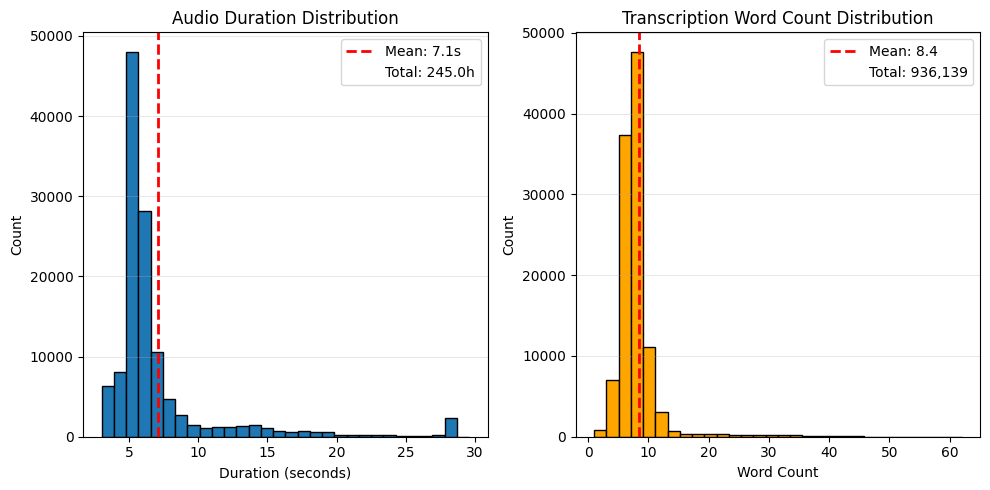

In [24]:
from scripts.dataset_plotting import plot_distribution_graphs

plot_distribution_graphs(combined_case_sensitive_df)

## Part 2

In [31]:
feruza_speech_df = pd.read_csv("feruza_speech_part2.csv", index_col="id")
feruza_speech_df.drop(columns=["text_cyrillic"], inplace=True)
feruza_speech_df.rename(columns={"text_latin": "text_original"}, inplace=True)

# Reorder text_original column to be one before the last column
cols = ["path", "type", "duration", "word_count", "text_original", "text_spt"]
feruza_speech_df = feruza_speech_df[cols]

feruza_speech_df = apply_similarity_metrics(feruza_speech_df)
feruza_speech_df

,path,type,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,
362,029-92_augmented_pch_msk.wav,train,5.5001,3,"CH..., 1-may.",Ch 1-may,"CH..., 1-may.",Ch 1-may,1.0,0.4615,0.6667,2,2
361,029-92_augmented_spd_nse.wav,train,6.9566,3,"CH..., 1-may.",Ch 1-may,"CH..., 1-may.",Ch 1-may,1.0,0.4615,0.6667,2,2
360,029-92_augmented_spd_pch.wav,train,4.4474,3,"CH..., 1-may.",Ch 1-may,"CH..., 1-may.",Ch 1-may,1.0,0.4615,0.6667,2,2
231,026-01_augmented_nse_msk.wav,train,3.3800,3,"B..., 19-mart.",B 19-mart,"B..., 19-mart.",B 19-mart,1.0,0.3571,0.7826,2,2
230,026-01_augmented_pch_msk.wav,train,3.3800,3,"B..., 19-mart.",B 19-mart,"B..., 19-mart.",B 19-mart,1.0,0.3571,0.7826,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,024-100_augmented_spd_nse.wav,train,24.3619,25,"Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...",0.0,0.0000,1.0000,25,25
372,024-100_augmented_spd_pch.wav,train,22.0008,25,"Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...","Yana bir qilmishi oshkor bo'lgan edi. Demak, o...",0.0,0.0000,1.0000,25,25
371,021-64_augmented_nse_msk.wav,train,15.6000,21,Shirin-shirin kulimsirab turgan inju tishlarig...,Shirin-shirin kulimsirab turgan inju tishlarig...,Shirin-shirin kulimsirab turgan inju tishlarig...,Shirin-shirin kulimsirab turgan inju tishlarig...,0.0,0.0000,1.0000,21,21


In [32]:
mask = feruza_speech_df["wer"] > 0.0
total_duration_affected = feruza_speech_df[mask]["duration"].sum() / 3600
total_duration = feruza_speech_df["duration"].sum() / 3600

feruza_speech_df.loc[mask, "ref_normalized"] = feruza_speech_df.loc[mask, "hyp_normalized"]
feruza_speech_df.loc[mask, "wer"] = 0.0
feruza_speech_df.loc[mask, "cer"] = 0.0
feruza_speech_df.loc[mask, "sequence_similarity"] = 1.0
feruza_speech_df.loc[mask, "ref_word_count"] = feruza_speech_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
feruza_speech_df.to_csv("feruza_speech_modified_part2.csv", index_label="id")

Total duration affected: 2.23 hours (out of 3.22 hours)


In [33]:
common_voice_df = pd.read_csv("common_voice_part2.csv", index_col="id")
common_voice_df.drop(columns={"speaker_trust_score"}, inplace=True)
common_voice_df.rename(
    columns={"sentence": "text_original", "predicted_sentence": "text_spt", "client_id": "speaker_id"},
    inplace=True
)

# Rename dataset type: dev -> validation
common_voice_df["type"] = common_voice_df["type"].replace("dev", "validation")
common_voice_df["path"] = common_voice_df["path"].str.replace(r".mp3$", ".wav", regex=True)

# Reorder text_original column to be one before the last column
cols = list(common_voice_df.columns)
cols.remove("text_original")
cols.insert(10, "text_original")
cols.remove("text_spt")
cols.insert(11, "text_spt")
cols.remove("speaker_id")
cols.insert(1, "speaker_id")
common_voice_df = common_voice_df[cols]

common_voice_df = apply_similarity_metrics(common_voice_df)
common_voice_df

,path,speaker_id,sentence_id,up_votes,down_votes,age,gender,type,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,,,,,,,,
7571,common_voice_uz_28892774.wav,633f4e362252d4c478e27f908b68480f89933e92839bb0...,a5356ceefe726034a0742413320f4c76f853b887750144...,2,0,twenties,male_masculine,train,3.456,2,O'g'illarini uylantirdi.,o'g'illarini uylantirdi,O'g'illarini uylantirdi.,o'g'illarini uylantirdi,1.0,0.0833,0.9362,2,2
6553,common_voice_uz_29492915.wav,aa6ecc7fd43b0bd12a2ef4265a218102d3c964d4c19e96...,2df183e98e1caf5e45b1d65b9c76b2d9d7e64e4f54e75d...,2,0,NaN,NaN,test,3.420,2,"Ayniqsa, oyimni",Ayniqsa oyimni.,"Ayniqsa, oyimni",Ayniqsa oyimni.,1.0,0.1333,0.9333,2,2
6707,common_voice_uz_29659552.wav,c9ca42351a125d9d954efb587e6965622b120307845e4a...,4874e1acfcf4e5aa96de55672fc4dbcee42d1364523702...,2,0,teens,male_masculine,test,3.708,2,O'rgatib oldingizmi,o'rgatib oldingizmi?,O'rgatib oldingizmi,o'rgatib oldingizmi?,1.0,0.1053,0.9231,2,2
5145,common_voice_uz_29771945.wav,65701bd746d41eb89b41eeac8caeb46055c868dafda4d8...,607d988fb82cb3827f5413756cdfad582e5f66145fe46a...,2,0,NaN,NaN,test,4.320,2,"Kelajagi, davomi.",kelajagi davomi,"Kelajagi, davomi.",kelajagi davomi,1.0,0.1765,0.8750,2,2
6526,common_voice_uz_28894630.wav,72f41c6b4733d93836e0def2d211362ac6db2632ea326a...,b353ac590bcd763f95225d405a6b7451a571a53eff16b9...,2,0,teens,female_feminine,train,3.780,3,O'n yettinchi asr.,17-asr,O'n yettinchi asr.,17-asr,1.0,0.8333,0.2500,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,common_voice_uz_28828269.wav,bd299afdd61c7e10f6352a24b16206e2e97339a36777a3...,3634596e8202fc0729249ecb56d5f78fd635da7b704e5f...,2,0,teens,male_masculine,test,5.148,5,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,Malika nihoyatda nazokat bilan gaplashadi.,0.0,0.0000,1.0000,5,5
4634,common_voice_uz_28903020.wav,cbe9f3a0053bef07470f5179a26f992986f75403738e79...,7e90a30314927ba70b5b4cc227a10c642f33c6fb2c70ec...,2,0,NaN,NaN,test,4.940,5,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,Biz bir muddat yolg'iz qoldik.,0.0,0.0000,1.0000,5,5
1913,common_voice_uz_30657618.wav,793fe0ce43a754a201704b36515c39acc4c902366c6dde...,0fed99a28f21ba7d1a4ed8d947163f51e2f04341fe9d5e...,0,0,twenties,male_masculine,train,6.050,8,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,Zamonimiz qahramonining shafqatsiz taqdiri men...,0.0,0.0000,1.0000,8,8


In [34]:
mask = common_voice_df["wer"] > 0.0
total_duration_affected = common_voice_df[mask]["duration"].sum() / 3600
total_duration = common_voice_df["duration"].sum() / 3600

common_voice_df.loc[mask, "ref_normalized"] = common_voice_df.loc[mask, "hyp_normalized"]
common_voice_df.loc[mask, "wer"] = 0.0
common_voice_df.loc[mask, "cer"] = 0.0
common_voice_df.loc[mask, "sequence_similarity"] = 1.0
common_voice_df.loc[mask, "ref_word_count"] = common_voice_df.loc[mask, "hyp_word_count"]

test_val_df = common_voice_df[common_voice_df["type"].isin(["test", "validation"])]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
test_val_df.to_csv("common_voice_modified_part2.csv", index_label="id")

Total duration affected: 7.83 hours (out of 13.70 hours)


In [35]:
uzbek_voice_df = pd.read_csv("uzbek_voice_part2.csv", index_col="id")

uzbek_voice_df.drop(columns={"net_votes"}, inplace=True)

uzbek_voice_df

,speaker_id,path,accent_region,up_votes,down_votes,reported_count,age,gender,duration,word_count,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count,type
id,,,,,,,,,,,,,,,,,,,,
0,eecc8201-90e7-4fe9-9875-0d0e15246047,123.wav,Toshkent shahri,5,0,0,50-59,female_feminine,3.0960,3,Haqiqiy fransuzcha ekler.,haqiqiy fransuzcha ekler,haqiqiy fransuzcha ekler,haqiqiy fransuzcha ekler,0.0,0.0,1.0,3,3,train
1,eecc8201-90e7-4fe9-9875-0d0e15246047,124.wav,Toshkent shahri,4,0,0,50-59,female_feminine,3.8520,4,O‘zbekistonlik mashhurlarning bolaligi .,O'zbekistonlik mashhurlarning bolaligi,o'zbekistonlik mashhurlarning bolaligi,o'zbekistonlik mashhurlarning bolaligi,0.0,0.0,1.0,3,3,train
2,eecc8201-90e7-4fe9-9875-0d0e15246047,129.wav,Toshkent shahri,5,0,0,50-59,female_feminine,3.9960,3,“O‘qituvchilardan ko‘nglim qoldi.,O'qituvchilardan ko'nglim qoldi.,o'qituvchilardan ko'nglim qoldi,o'qituvchilardan ko'nglim qoldi,0.0,0.0,1.0,3,3,train
3,2473562c-3f2d-49a5-b780-7a1809db4f2e,159.wav,Namangan,5,0,0,25-34,female_feminine,3.3480,3,Misol keltiradigan bo‘lsam.,misol keltiradigan bo'lsam,misol keltiradigan bo'lsam,misol keltiradigan bo'lsam,0.0,0.0,1.0,3,3,train
4,f17a9f7e-eea8-4bd2-a4bc-c5586da0df3b,164.wav,Toshkent shahri,5,0,0,18-24,female_feminine,3.0600,3,Futbolning yuqori darajasi.,futbolning yuqori darajasi,futbolning yuqori darajasi,futbolning yuqori darajasi,0.0,0.0,1.0,3,3,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60428,2f22150b-721c-4dc6-b2dd-ad02e453bceb,854864_augmented_pch_msk.wav,Xorazm,0,0,0,18-24,female_feminine,5.6160,7,"• Qiyin ishni oldinga, osonini keyinga sur.\r","Qiyin ishni oldinga, osonini keyinga sur.",qiyin ishni oldinga osonini keyinga sur,qiyin ishni oldinga osonini keyinga sur,0.0,0.0,1.0,6,6,train
60429,2f22150b-721c-4dc6-b2dd-ad02e453bceb,854866_augmented_spd_nse.wav,Xorazm,0,0,0,18-24,female_feminine,7.4413,7,"Bo‘lmaydi! Qanday bo‘lsa, shundayligicha el qi...","Bo'lmaydi, qanday bo'lsa shundayligicha el qil...",bo'lmaydi qanday bo'lsa shundayligicha el qili...,bo'lmaydi qanday bo'lsa shundayligicha el qili...,0.0,0.0,1.0,7,7,train
60430,2f22150b-721c-4dc6-b2dd-ad02e453bceb,854866_augmented_pch_msk.wav,Xorazm,0,0,0,18-24,female_feminine,7.2360,7,"Bo‘lmaydi! Qanday bo‘lsa, shundayligicha el qi...","Bo'lmaydi, qanday bo'lsa shundayligicha el qil...",bo'lmaydi qanday bo'lsa shundayligicha el qili...,bo'lmaydi qanday bo'lsa shundayligicha el qili...,0.0,0.0,1.0,7,7,train


In [36]:
# Example: O‘ylashimcha, hammasi yaxshilikka”, deydi Jaloliddinov.
trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)
matched = uzbek_voice_df[trailing_quote_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df["text_spt"] = uzbek_voice_df["text_spt"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)
uzbek_voice_df.loc[trailing_quote_mask, "text_original"] = uzbek_voice_df.loc[
    trailing_quote_mask, "text_original"].str.replace(
    r"(^[^“]*)”([^“]*$)",
    r"\1\2",
    regex=True
)

matched

/tmp/ipykernel_904369/1253041954.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  trailing_quote_mask = uzbek_voice_df["text_spt"].str.contains(r"(^[^“]*)”([^“]*$)", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
46333,52636.wav,"Istalgan turdagi zo‘ravonlikka”, deydi Infantino.","Istalgan turdagi zo‘ravonlikka”, deydi Infantino.",istalgan turdagi zo'ravonlikka deydi infantino
46404,60154.wav,"Seni ko‘rganimdan xursandman”, deydi Nikol.","Seni ko‘rganimdan xursandman”, deydi Nikol.",seni ko'rganimdan xursandman deydi nikol
46435,67148.wav,"Baqirdim, chaqirdim...” Uyog‘iga faqat yig‘lagan.","Baqirdim, chaqirdim...” Uyog‘iga faqat yig‘lagan.",baqirdim chaqirdim uyog'iga faqat yig'lagan
47064,107424.wav,"To‘qqiz kishi jabrlandi”, deydi agentlik suhba...","To‘qqiz kishi jabrlandi”, deydi agentlik suhba...",to'qqiz kishi jabrlandi deydi agentlik suhbatd...
47303,119746.wav,"Munisa!”, deb baqirayotganini ko‘rish mumkin.","Munisa!”, deb baqirayotganini ko‘rish mumkin.",munisa deb baqirayotganini ko'rish mumkin
47527,135565.wav,"Uni konsertgacha premyera qilamiz”, qo‘shimcha...","Uni konsertgacha premyera qilamiz”, qo‘shimcha...",uni konsertgacha premyera qilamiz qo'shimcha q...
48151,160296.wav,"Aslida musobaqani yomon o‘tkazmadik”, dedi Lyu...","Aslida musobaqani yomon o‘tkazmadik”, dedi Lyu...",aslida musobaqani yomon o'tkazmadik dedi lyubi...
48184,162378.wav,"O‘qituvchi jamiyatning poydevori”, deya qo‘shi...","O‘qituvchi jamiyatning poydevori”, deya qo‘shi...",o'qituvchi jamiyatning poydevori deya qo'shimc...
48374,169453.wav,Bu xuddi Yevropa ittifoqiga o‘xshagan birlashu...,Bu xuddi Yevropa ittifoqiga o‘xshagan birlashu...,bu xuddi yevropa ittifoqiga o'xshagan birlashu...


In [37]:
# Examples: 8 677 960, 971 483, 1 483
only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)
matched = uzbek_voice_df[only_numbers_mask][["path", "text_original", "text_spt", "ref_normalized"]]

uzbek_voice_df.loc[only_numbers_mask, "text_spt"] = uzbek_voice_df.loc[only_numbers_mask, "text_original"]

uzbek_voice_df.to_csv("uzbek_voice_modified_part2.csv", index_label="id")
matched

/tmp/ipykernel_904369/4023398073.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  only_numbers_mask = uzbek_voice_df["text_spt"].str.contains(r"^(\d+(?: \d{3})*)$", regex=True)


,path,text_original,text_spt,ref_normalized
id,,,,
45719,855105.wav,18 097,18097,o'n sakkiz ming to'qson yetti
45721,855293.wav,12 054,12054,o'n ikki ming ellik to'rt
45722,855298.wav,14 004,14004,o'n to'rt ming to'rt
45723,855307.wav,85 005,85005,sakson besh ming besh
45724,855310.wav,12 227,12 227,o'n ikki ming ikki yuz yigirma yetti
...,...,...,...,...
55168,861642.wav,826 482,826482,sakkiz yuz yigirma olti ming to'rt yuz sakson ...
55169,861648.wav,71 065,71065,yetmish bir ming oltmish besh
55170,861652.wav,944 507,944507,to'qqiz yuz qirq to'rt ming besh yuz yetti


In [38]:
uzbek_voice_df = apply_similarity_metrics(uzbek_voice_df)

case_not_aligned_mask = uzbek_voice_df["wer"] > 0.0
uzbek_voice_df[case_not_aligned_mask][["text_original", "text_spt", "ref_normalized", "hyp_normalized"]]

,text_original,text_spt,ref_normalized,hyp_normalized
id,,,,
183,“Barkamol avlod2014” musobaqalarida.,Barkamol avlod 2014 musobaqalarida,"""Barkamol avlod2014"" musobaqalarida.",Barkamol avlod 2014 musobaqalarida
518,Ishsizlik darajasi: 5.0%.,ishsizlik darajasi 5%,Ishsizlik darajasi: 5.0%.,ishsizlik darajasi 5%
467,"Hammasi “Niva”, “UAZ” mashinalari.",hammasi Niva Uaz mashinalari,"Hammasi ""Niva"", ""UAZ"" mashinalari.",hammasi Niva Uaz mashinalari
390,"“Shunchaki do‘stlar”, 2005-yil.",Shunchaki do'stlar 2005-yil,"""Shunchaki do'stlar"", 2005-yil.",Shunchaki do'stlar 2005-yil
11571,Darvozabonlar Himoyachilar Yarim himoyachilar ...,"darvozabonlar, himoyachilar, yarim himoyachila...",Darvozabonlar Himoyachilar Yarim himoyachilar ...,"darvozabonlar, himoyachilar, yarim himoyachila..."
...,...,...,...,...
43737,"Sovet ittifoqi davrida senzura bor edi, lekin ...","Sovet Ittifoqi davrida senzura bor edi, lekin ...","Sovet ittifoqi davrida senzura bor edi, lekin ...","Sovet Ittifoqi davrida senzura bor edi, lekin ..."
44525,Maktab avtobusi oʻquvchilarni tushirish uchun ...,Maktab avtobusi o'quvchilarni tushirish uchun ...,Maktab avtobusi o'quvchilarni tushirish uchun ...,Maktab avtobusi o'quvchilarni tushirish uchun ...
44708,Samolyotlarning katta qismi oq rangda boʻladi ...,Samolyotlarning katta qismi oq rangda bo'ladi ...,Samolyotlarning katta qismi oq rangda bo'ladi ...,Samolyotlarning katta qismi oq rangda bo'ladi ...


In [39]:
# Reorder type column
cols = list(uzbek_voice_df.columns)
cols.remove("type")
cols.insert(2, "type")
uzbek_voice_df = uzbek_voice_df[cols]

uzbek_voice_df = uzbek_voice_df[~uzbek_voice_df.duplicated(subset=["path", "speaker_id"], keep="first")]

mask = uzbek_voice_df["wer"] > 0.0
total_duration_affected = uzbek_voice_df[mask]["duration"].sum() / 3600
total_duration = uzbek_voice_df["duration"].sum() / 3600

uzbek_voice_df.loc[mask, "ref_normalized"] = uzbek_voice_df.loc[mask, "hyp_normalized"]
uzbek_voice_df.loc[mask, "wer"] = 0.0
uzbek_voice_df.loc[mask, "cer"] = 0.0
uzbek_voice_df.loc[mask, "sequence_similarity"] = 1.0
uzbek_voice_df.loc[mask, "ref_word_count"] = uzbek_voice_df.loc[mask, "hyp_word_count"]

print(f"Total duration affected: {total_duration_affected:.2f} hours (out of {total_duration:.2f} hours)")
uzbek_voice_df.to_csv("uzbek_voice_modified_part2.csv", index_label="id")

Total duration affected: 27.43 hours (out of 89.63 hours)


In [3]:
news_df = pd.read_csv("news_dataset_part2.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
news_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

news_df = apply_similarity_metrics(news_df)
news_df

,path,duration,type,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,
331,00011451_0.wav,4.4000,train,19065 koykaga,o'n to'qqiz ming oltmish besh koykaga,19065 koykaga,o'n to'qqiz ming oltmish besh koykaga,2.5000,2.2308,0.3200,2,6
9626,00010266_0.wav,11.9700,train,rezolyutiv qismini e'lon qilaman. O'zbekiston ...,men rezolyutiv qismini e'lon qilaman. O'zbekis...,rezolyutiv qismini e'lon qilaman. O'zbekiston ...,men rezolyutiv qismini e'lon qilaman. O'zbekis...,1.8824,1.3047,0.4511,17,40
290,00011161_0.wav,7.5300,train,Даже если этого постановления нету. 16-iyulda ...,"Daje yesli etogo postanovleniya netu, o'n olti...",Даже если этого постановления нету. 16-iyulda ...,"Daje yesli etogo postanovleniya netu, o'n olti...",1.6250,1.0896,0.3432,8,14
9660,00010307_0.wav,7.0300,train,43 812 220 so'm Mirzakalonov Otabek Erkinjon o...,qirq uch million sakkiz yuz o'n ikki ming ikki...,43 812 220 so'm Mirzakalonov Otabek Erkinjon o...,qirq uch million sakkiz yuz o'n ikki ming ikki...,1.5000,1.0556,0.5860,8,16
0,00004289_0.wav,10.6700,train,128 million 177 500 so'm pul hamda 2016-yil 24...,"bir yuz yigirma sakkiz million, bir yuz yetmis...",128 million 177 500 so'm pul hamda 2016-yil 24...,"bir yuz yigirma sakkiz million, bir yuz yetmis...",1.3333,1.0364,0.5823,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...
11049,00008539_augmented_spd_nse.wav,4.8536,train,moddasida jinoiy javobgarlik belgilangan.,moddasida jinoiy javobgarlik belgilangan.,moddasida jinoiy javobgarlik belgilangan.,moddasida jinoiy javobgarlik belgilangan.,0.0000,0.0000,1.0000,4,4
11050,00008539_augmented_pch_msk.wav,5.2321,train,moddasida jinoiy javobgarlik belgilangan.,moddasida jinoiy javobgarlik belgilangan.,moddasida jinoiy javobgarlik belgilangan.,moddasida jinoiy javobgarlik belgilangan.,0.0000,0.0000,1.0000,4,4
11057,00008614_augmented_spd_nse.wav,8.1944,train,kasallangan fuqarolarimizning oila a'zolariga ...,kasallangan fuqarolarimizning oila aʼzolariga ...,kasallangan fuqarolarimizning oila a'zolariga ...,kasallangan fuqarolarimizning oila a'zolariga ...,0.0000,0.0000,1.0000,9,9


In [4]:
mask = news_df["wer"] > 0.0
not_aligned_duration = news_df[mask]["duration"].sum() / 3600
total_duration = news_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
news_df.to_csv("news_dataset_modified_part2.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 47.42 hours (out of 54.66 hours)


In [42]:
it_df = pd.read_csv("it_dataset_part2.csv", index_col="id")

# Swap places of text_spt (Google STT generated as reference) -> text_original (Gemini 2.5 Pro generated as hypothesis)
# Because apply_similarity_metrics method assumes text_original as reference
it_df.rename(
    columns={"text_spt": "text_original", "text_original": "text_spt"},
    inplace=True
)

it_df = apply_similarity_metrics(it_df)
it_df = it_df[[
    "path", "duration", "type", "text_original", "text_spt", "ref_normalized", "hyp_normalized", "wer", "cer",
    "sequence_similarity", "ref_word_count", "hyp_word_count"
]]

it_df

,path,duration,type,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,sequence_similarity,ref_word_count,hyp_word_count
id,,,,,,,,,,,,
970,09757_augmented_spd_nse.wav,7.6177,train,"Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...","Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...",0.7500,0.0735,0.9343,8,9
971,09757_augmented_pch_msk.wav,7.3047,train,"Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...","Assalomu alaykum, ismim Botirjon, familiyam Ha...","Assalomu alaykum. Ismim Botirjon, familiyam Ha...",0.7500,0.0735,0.9343,8,9
1466,16134_augmented_spd_nse.wav,17.7436,train,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,0.7000,0.3009,0.1647,30,39
1467,16134_augmented_pch_msk.wav,17.9467,train,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,"Bu start 2022-yilgacha start qilamiz, xudo xoh...",bu start ikki ming yigirma ikkinchi yilgacha h...,0.7000,0.3009,0.1647,30,39
2270,12139.wav,14.2240,test,"yaxshi savol, meni holatimda bu narsa vaziyatn...","Yaxshi savol. Mani holatimda bu narsa, aa, vaz...","yaxshi savol, meni holatimda bu narsa vaziyatn...","Yaxshi savol. Mani holatimda bu narsa, aa, vaz...",0.5882,0.1190,0.9147,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...
1733,18258_augmented_pch_msk.wav,7.6300,train,"12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...",0.0000,0.0000,1.0000,12,12
1732,18258_augmented_spd_nse.wav,7.4534,train,"12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...",0.0000,0.0000,1.0000,12,12
384,04354_augmented_spd_nse.wav,4.3671,train,Keyingi savolim.,Keyingi savolim.,Keyingi savolim.,Keyingi savolim.,0.0000,0.0000,1.0000,2,2


In [43]:
mask = it_df["wer"] > 0.0
not_aligned_duration = it_df[mask]["duration"].sum() / 3600
total_duration = it_df["duration"].sum() / 3600

print("Nothing changed here.")
print(f"Not aligned total duration: {not_aligned_duration:.2f} hours (out of {total_duration:.2f} hours)")
it_df.to_csv("it_dataset_modified_part2.csv", index_label="id")

Nothing changed here.
Not aligned total duration: 8.71 hours (out of 9.41 hours)


## Combine All Case Sensitive Datasets

In [6]:
feruza_speech_df = pd.read_csv("feruza_speech_modified_part2.csv", index_col="id")
common_voice_df = pd.read_csv("common_voice_modified_part2.csv", index_col="id")
uzbek_voice_df = pd.read_csv("uzbek_voice_modified_part2.csv", index_col="id")
news_df = pd.read_csv("news_dataset_modified_part2.csv", index_col="id")
it_df = pd.read_csv("it_dataset_modified_part2.csv", index_col="id")

feruza_speech_df["dataset"] = "feruza_speech"
common_voice_df["dataset"] = "common_voice"
uzbek_voice_df["dataset"] = "uzbek_voice"
news_df["dataset"] = "news"
it_df["dataset"] = "it"

combined_case_sensitive_df = pd.concat(
    [feruza_speech_df, common_voice_df, uzbek_voice_df, news_df, it_df],
    axis=0,
    ignore_index=True
)
# Reorder dataset column
cols = list(combined_case_sensitive_df.columns)
cols.remove("dataset")
cols.insert(2, "dataset")
cols.remove("word_count")
cols.insert(-1, "word_count")
combined_case_sensitive_df = combined_case_sensitive_df[cols]

combined_case_sensitive_df.to_csv("combined__case_sensitive_part2.csv", index_label="id")
combined_case_sensitive_df

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,word_count,reported_count
0,029-92_augmented_pch_msk.wav,train,feruza_speech,5.5001,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,029-92_augmented_spd_nse.wav,train,feruza_speech,6.9566,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,029-92_augmented_spd_pch.wav,train,feruza_speech,4.4474,"CH..., 1-may.",Ch 1-may,Ch 1-may,Ch 1-may,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,026-01_augmented_nse_msk.wav,train,feruza_speech,3.3800,"B..., 19-mart.",B 19-mart,B 19-mart,B 19-mart,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,026-01_augmented_pch_msk.wav,train,feruza_speech,3.3800,"B..., 19-mart.",B 19-mart,B 19-mart,B 19-mart,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79263,18258_augmented_pch_msk.wav,train,it,7.6300,"12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...",0.0,0.0,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79264,18258_augmented_spd_nse.wav,train,it,7.4534,"12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...","12-noyabrdan darslarimiz boshlangan bo'lsa, ro...",0.0,0.0,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79265,04354_augmented_spd_nse.wav,train,it,4.3671,Keyingi savolim.,Keyingi savolim.,Keyingi savolim.,Keyingi savolim.,0.0,0.0,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79266,05920_augmented_pch_msk.wav,train,it,7.2000,XS qismida esa mana pastroqqa tushamiz. Bu quy...,XS qismida esa mana pastroqqa tushamiz. Bu quy...,XS qismida esa mana pastroqqa tushamiz. Bu quy...,XS qismida esa mana pastroqqa tushamiz. Bu quy...,0.0,0.0,...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
combined_case_sensitive_df.describe(include="all")

,path,type,dataset,duration,text_original,text_spt,ref_normalized,hyp_normalized,wer,cer,...,hyp_word_count,speaker_id,sentence_id,up_votes,down_votes,age,gender,accent_region,word_count,reported_count
count,79268,79268,79268,79268.000000,79254,79268,79254,79268,79268.000000,79268.000000,...,79268.000000,62933,2502,62933.000000,62933.000000,61203,61851,59818,63763.000000,60431.000000
unique,79262,3,5,NaN,67855,68267,68178,68200,NaN,NaN,...,NaN,4170,2502,NaN,NaN,16,3,17,NaN,NaN
top,00004136_0.wav,train,uzbek_voice,NaN,[musiqa],[musiqa],[musiqa],[musiqa],NaN,NaN,...,NaN,64f7ffe1-2c4e-459e-9155-5fc9a0bbe539,2df183e98e1caf5e45b1d65b9c76b2d9d7e64e4f54e75d...,NaN,NaN,18-24,female_feminine,Jizzax,NaN,NaN
freq,2,66545,60431,NaN,280,125,280,274,NaN,NaN,...,NaN,1459,1,NaN,NaN,45144,34778,8326,NaN,NaN
mean,NaN,NaN,NaN,7.311933,NaN,NaN,NaN,NaN,0.022216,0.005449,...,11.532081,NaN,NaN,0.816011,0.010281,NaN,NaN,NaN,7.908285,0.005610
std,NaN,NaN,NaN,5.065177,NaN,NaN,NaN,NaN,0.069452,0.035587,...,10.369921,NaN,NaN,1.816892,0.105191,NaN,NaN,NaN,2.281854,0.076872
min,NaN,NaN,NaN,2.310800,NaN,NaN,NaN,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,2.000000,0.000000
25%,NaN,NaN,NaN,5.040000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,7.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,7.000000,0.000000
50%,NaN,NaN,NaN,5.570100,NaN,NaN,NaN,NaN,0.000000,0.000000,...,8.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,8.000000,0.000000
75%,NaN,NaN,NaN,6.768000,NaN,NaN,NaN,NaN,0.000000,0.000000,...,10.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,9.000000,0.000000


In [10]:
print_dataset_statistics(combined_case_sensitive_df)

At least 4,170 speakers involved

Combined total duration: 161.00 hours (86.03% is training data)
Reed speech training data duration: 78.74 hours (56.85%)
Conversation speech training data duration: 59.77 hours (43.15%)
Augmented duration: 27.16 hours
Augmented portion in training data: 19.61%

dataset        type      
common_voice   test           2.751890
               validation     1.328719
feruza_speech  train          3.217020
it             test           0.737151
               train          7.940193
               validation     0.735187
news           test           1.729239
               train         51.826843
               validation     1.106672
uzbek_voice    test           7.160320
               train         75.527433
               validation     6.939970
Name: duration, dtype: float64

dataset        is_augmented
common_voice   False            4.080609
feruza_speech  True             3.217020
it             False            1.472338
               True        

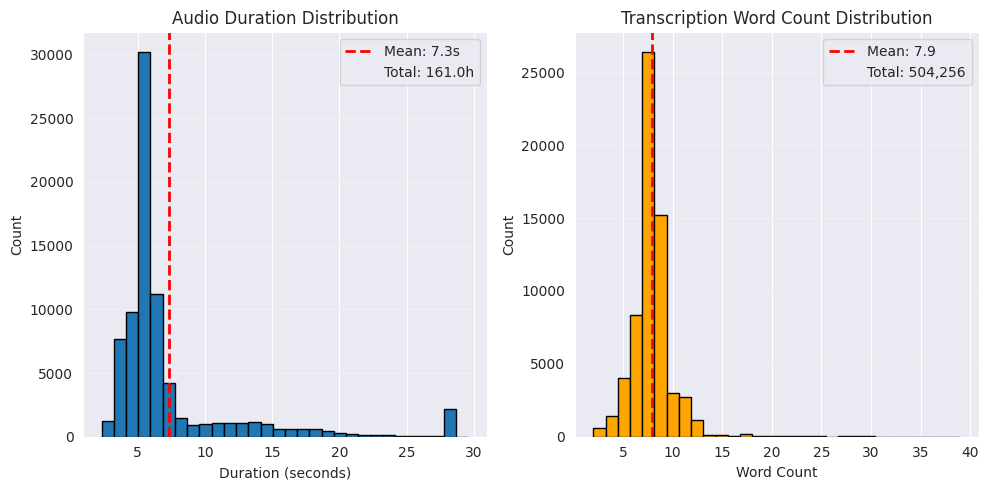

In [11]:
from scripts.dataset_plotting import plot_distribution_graphs

plot_distribution_graphs(combined_case_sensitive_df)